In [2]:
!pip install -r requirements.txt

In [2]:
# Import data
import pandas as pd

df_cab_data = pd.read_csv('DataSets-main/Cab_Data.csv')
df_city = pd.read_csv('DataSets-main/City.csv')
df_cust_data = pd.read_csv('DataSets-main/Customer_ID.csv')
df_trans_data = pd.read_csv('DataSets-main/Transaction_ID.csv')

In [13]:
# Merge data based on shared columns into final dataset
df_trans_cust_left_merge = df_trans_data.merge(df_cust_data, how='left')
df_cab_trans_cust = df_cab_data.merge(df_trans_cust_left_merge, how='left')
df_final = df_cab_trans_cust.merge(df_city, how='left')

# Split final dataset by company
yellow_cab_data = df_final[df_final['Company'] == 'Yellow Cab']
pink_cab_data = df_final[df_final['Company'] == 'Pink Cab']

df_final

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,"418,859","127,001"
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,"418,859","127,001"
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,"418,859","127,001"
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,"418,859","127,001"


In [5]:
# First, we see that yellow cab has more customers than pink cab
yc_customer_count = yellow_cab_data['Customer ID'].nunique()
pc_customer_count = pink_cab_data['Customer ID'].nunique()

print("Yellow customer count: ", yc_customer_count)
print("Pink customer count: ", pc_customer_count)

# We know that the data is collected over the course of 35 months, so we can find monthly spending
yc_spending = yellow_cab_data.groupby('Customer ID')['Price Charged'].sum().reset_index()
yc_spending.columns = ['Customer ID', 'Money Spent per Month']
yc_spending['Money Spent per Month'] = yc_spending['Money Spent per Month'] / 35

pc_spending = pink_cab_data.groupby('Customer ID')['Price Charged'].sum().reset_index()
pc_spending.columns = ['Customer ID', 'Money Spent per Month']
pc_spending['Money Spent per Month'] = pc_spending['Money Spent per Month'] / 35

yc_average_monthly_spending = yc_spending['Money Spent per Month'].mean()
pc_average_monthly_spending = pc_spending['Money Spent per Month'].mean()

print("Average monthly spending for yellow cab: ", yc_average_monthly_spending)
print("Average monthly spending for pink cab: ", pc_average_monthly_spending)

# Conclusion of code: yellow cab has more customers than the pink cab and
#the mean monthly spending for yellow cab customers is greater than mean monthly spending for pink cab customers


Yellow customer count:  39896
Pink customer count:  32330
Average monthly spending for yellow cab:  90.12997163338967
Average monthly spending for pink cab:  23.26742196986434


In [6]:
# Lets take into account monthly income 
yc_income = yellow_cab_data[['Customer ID', 'Income (USD/Month)']].drop_duplicates()
yc_spending_and_income = pd.merge(yc_spending, yc_income, on='Customer ID')
yc_spending_and_income['Money Spent per $ of Income'] = yc_spending_and_income['Money Spent per Month'] / yc_spending_and_income['Income (USD/Month)']
print("Yellow cab spending per dollar of income: ", yc_spending_and_income['Money Spent per $ of Income'].mean())

pc_income = yellow_cab_data[['Customer ID', 'Income (USD/Month)']].drop_duplicates()
pc_spending_and_income = pd.merge(pc_spending, pc_income, on='Customer ID')
pc_spending_and_income['Money Spent per $ of Income'] = pc_spending_and_income['Money Spent per Month'] / pc_spending_and_income['Income (USD/Month)']
print("Pink cab spending per dollar of income: ", pc_spending_and_income['Money Spent per $ of Income'].mean())

# Conclusion of code: Yellow cab customers spend more than 4x the amount pink cab customers do per dollar of income

Yellow cab spending per dollar of income:  0.009223904424841842
Pink cab spending per dollar of income:  0.0026757398060508813


In [7]:
# Lets check the growth of revenue over 35 months
yc_finances = yellow_cab_data.groupby('Date of Travel').agg(
    Price_Charged=('Price Charged', 'sum'), Cost_of_Trip=('Cost of Trip', 'sum')).reset_index()
yc_finances['Revenue'] = yc_finances['Price_Charged'] - yc_finances['Cost_of_Trip']

pc_finances = pink_cab_data.groupby('Date of Travel').agg(
    Price_Charged=('Price Charged', 'sum'), Cost_of_Trip=('Cost of Trip', 'sum')).reset_index()
pc_finances['Revenue'] = pc_finances['Price_Charged'] - pc_finances['Cost_of_Trip']

Text(0, 0.5, 'Revenue')

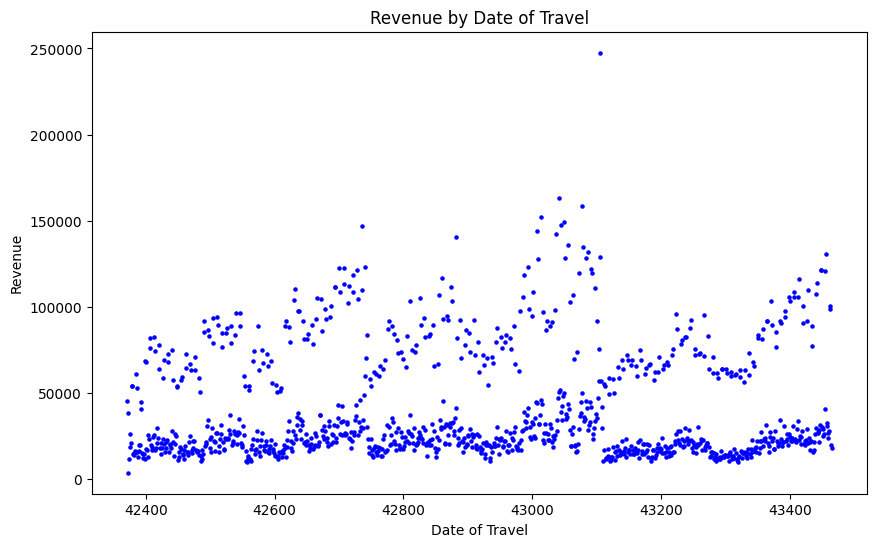

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(yc_finances['Date of Travel'], yc_finances['Revenue'], color='blue', marker='o', s=5)
plt.title('Revenue by Date of Travel')
plt.xlabel('Date of Travel')
plt.ylabel('Revenue')

Yellow cab average revenue:  40201.254037260274
Pink cab average revenue:  4846.875178995434


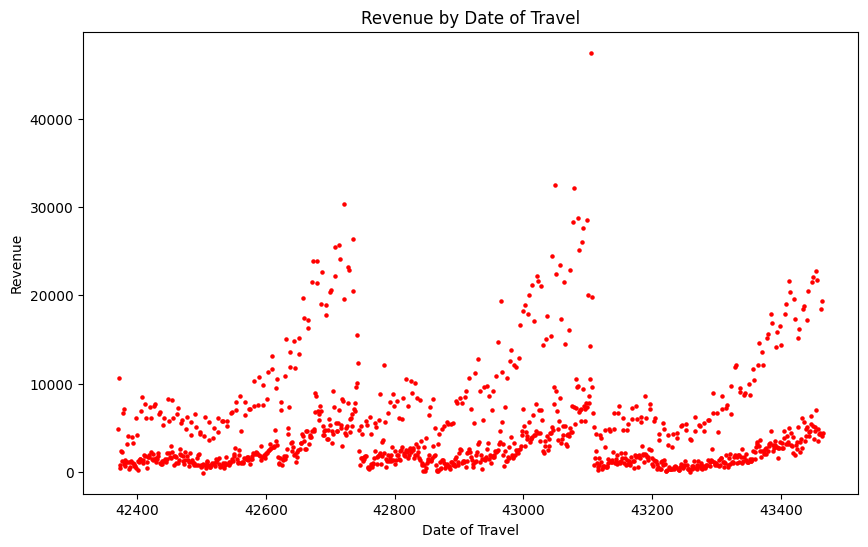

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(pc_finances['Date of Travel'], pc_finances['Revenue'], color='red', marker='o', s=5)
plt.title('Revenue by Date of Travel')
plt.xlabel('Date of Travel')
plt.ylabel('Revenue')

yc_avg_revenue = yc_finances['Revenue'].mean()
print("Yellow cab average revenue per day: ", yc_avg_revenue)

pc_avg_revenue = pc_finances['Revenue'].mean()
print("Pink cab average revenue per day: ", pc_avg_revenue)
# Conclusion of graphs: neither company shows strong growth in revenue, but yellow cabs daily revenue is significantly shifted higher than pink cab
# Although yellow cab is not showing growth, it is showing stability (no significant decreases in revenue over 35 month, indicates reliability)

In [12]:
# Now lets look at users per unit of population (to eliminate bias from more densely populated areas)
print("Yellow customer count: ", yc_customer_count)
print("Pink customer count: ", pc_customer_count)

yc_total_population = yellow_cab_data.groupby('City')['Population'].sum().reset_index()
pc_total_population = pink_cab_data.groupby('City')['Population'].sum().reset_index()

yc_total_population
pc_total_population

Yellow customer count:  39896
Pink customer count:  32330


,City,Population
0,ATLANTA GA,"814,885 814,885 814,885 814,885 814,885 ..."
1,AUSTIN TX,"698,371 698,371 698,371 698,371 698,371 ..."
2,BOSTON MA,"248,968 248,968 248,968 248,968 248,968 ..."
3,CHICAGO IL,"1,955,130 1,955,130 1,955,130 1,955,130 1..."
4,DALLAS TX,"942,908 942,908 942,908 942,908 942,908 ..."
5,DENVER CO,"754,233 754,233 754,233 754,233 754,233 ..."
6,LOS ANGELES CA,"1,595,037 1,595,037 1,595,037 1,595,037 1..."
7,MIAMI FL,"1,339,155 1,339,155 1,339,155 1,339,155 1..."
8,NASHVILLE TN,"327,225 327,225 327,225 327,225 327,225 ..."
9,NEW YORK NY,"8,405,837 8,405,837 8,405,837 8,405,837 8..."


In [20]:
# JOSHS WORK IDK
# price charged
price_charged_per_company = df_final.groupby('Company')['Price Charged'].sum().reset_index()
price_charged_per_company.columns = ['Company', 'Total Price Charged']
trip_cost_per_company = df_final.groupby('Company')['Cost of Trip'].sum().reset_index()
trip_cost_per_company.columns = ['Company', 'Total Cost of Trip']

pc_rev = price_charged_per_company.loc[0, 'Total Price Charged'] - trip_cost_per_company.loc[0, 'Total Cost of Trip']
yc_rev = price_charged_per_company.loc[1, 'Total Price Charged'] - trip_cost_per_company.loc[1, 'Total Cost of Trip']
print(f"Pink Cab Revenue:   {pc_rev}")
print(f"Yellow Cab Revenue: {yc_rev}")

Pink Cab Revenue:   5307328.320999999
Yellow Cab Revenue: 44020373.1708
